# Communitydora Project (Dinosario Version)

In [2]:
%pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
google-pasta                 0.2.0
grpcio                       1.62.1
h5py                         3.10.0
idna                         3.6
ipykernel                    6.29.4
ipython                      8.23.0
jedi                         0.19.1
jupyter_client               8.6.1
jupyter_core                 5.7.2
keras                        3.1.1
ki


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import os

# 1. Clean Data

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'archive'

In [7]:
allowed_imgs = ['jpeg', 'jpg', 'png']

In [8]:
os.listdir(data_dir)

['ankylosaurus', 'brontosaurus', 'pterodactyl', 'trex', 'triceratops']

In [ ]:
#Check to make sure images aren't unreadable 

In [9]:
for dino_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, dino_class)):
        img_path = os.path.join(data_dir, dino_class, img)
        try: 
            image = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in allowed_imgs:
                print('Image not allowed'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with image'.format(img_path))
            

### Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 200 files belonging to 5 classes.


In [52]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002A3FB4DE5C0>)

In [53]:
group = data_iterator.next()
group[1]

array([3, 0, 4, 2, 4, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 0, 3, 2, 0, 1, 0, 1,
       4, 1, 1, 4, 3, 0, 3, 0, 2, 3])

In [ ]:
#The following plot below shows what numbers were assigned to what dinosaur
#

## Grouping
The following images below show what number assignment each dinasur class was assigned.

0. Ankylosaurus
1. Brontosaurus
2. Pterodactly
3. Trex
4. triceratops

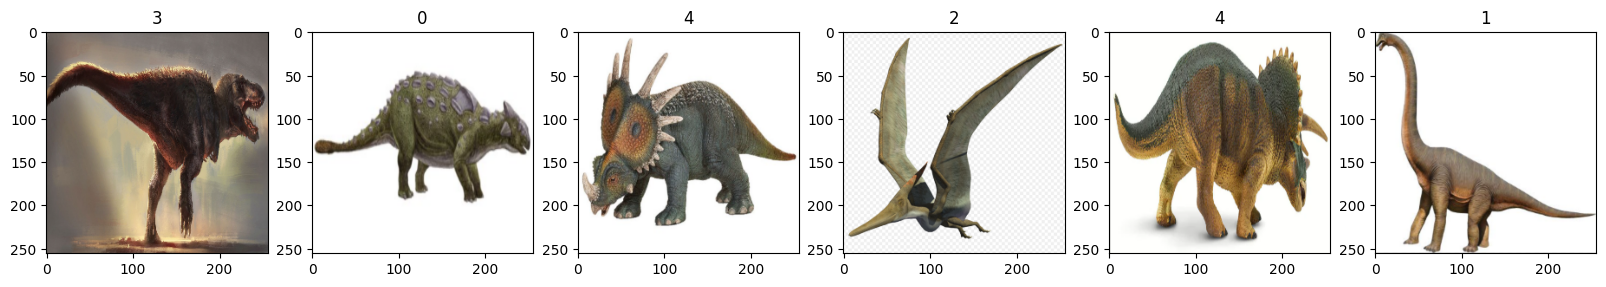

In [55]:

fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(group[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(group[1][idx])